#### 0. Utility methods

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

def get_missing_value_percentage(data):
    return (data.isnull().sum()/data.shape[0])*100

def draw_missing_value_percentage(data):
    temp = get_missing_value_percentage(data)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation = 90)
    sns.barplot(temp)
    plt.show()

# 1. Problem Statement

- in the telecom industry, customers churn(leave the service by a provider)
- the telecom industry has collected data for 3 months, there were churns in these 3 months.
- as a data scientist, we need to identify the patterns and reasons of these churns using ML modelling techniques
- the success of the model depends on the accuracy of predictions on the test(unseen) data. If we are able to predict the churn correctly for a reasonable number of customers in the unseen data, we can say which features impact the churn and what action items can be taken to reduce the churn(retain the customers)

# 2. First look at the data 

## 2.1 Loading and looking at the dataset

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dictionary = pd.read_csv('data_dictionary.csv')
inp0 = pd.read_csv('train.csv')

## 2.2 Shape

In [244]:
inp0.shape

(69999, 172)

## 2.3 Column comprehension

In [245]:
data = inp0
# a lot of columns have _6, _7, _8 in them, let's drop the suffix to understand what columns exist
columns = data.columns
columns = columns.str.replace('_6', '')
columns = columns.str.replace('_7', '')
columns = columns.str.replace('_8', '')
print(columns.unique().shape)
print(columns.unique().sort_values())

(64,)
Index(['aon', 'arpu', 'arpu_2g', 'arpu_3g', 'aug_vbc_3g', 'av_rech_amt_data',
       'churn_probability', 'circle_id', 'count_rech_2g', 'count_rech_3g',
       'date_of_last_rech', 'date_of_last_rech_data', 'fb_user', 'ic_others',
       'id', 'isd_ic_mou', 'isd_og_mou', 'jul_vbc_3g', 'jun_vbc_3g',
       'last_date_of_month', 'last_day_rch_amt', 'loc_ic_mou',
       'loc_ic_t2f_mou', 'loc_ic_t2m_mou', 'loc_ic_t2o_mou', 'loc_ic_t2t_mou',
       'loc_og_mou', 'loc_og_t2c_mou', 'loc_og_t2f_mou', 'loc_og_t2m_mou',
       'loc_og_t2o_mou', 'loc_og_t2t_mou', 'max_rech_amt', 'max_rech_data',
       'monthly_2g', 'monthly_3g', 'night_pck_user', 'offnet_mou', 'og_others',
       'onnet_mou', 'roam_ic_mou', 'roam_og_mou', 'sachet_2g', 'sachet_3g',
       'spl_ic_mou', 'spl_og_mou', 'std_ic_mou', 'std_ic_t2f_mou',
       'std_ic_t2m_mou', 'std_ic_t2o_mou', 'std_ic_t2t_mou', 'std_og_mou',
       'std_og_t2c_mou', 'std_og_t2f_mou', 'std_og_t2m_mou', 'std_og_t2o_mou',
       'std_og_t2t_mou',

In [ ]:
data = inp0
# direction of calls => ic, og
# type of calls => loc, std, isd, roam, spl, others
# call between operators => within network(t2t, t2f, t2c), outside network(t2m, t2o)
# mobile network band => 2g, 3g
# loyalty related => aon
# data usage related => vol_2g, vol_3g
# calling usage related => mou
# money related => arpu, rech_amt
# count related => rech_num, total_rech_data, count_rech_2g, count_rech_3g
# other parameters => fb_user
columns_to_select_1 = data.columns.str.contains('rech')
columns_to_select_2 = data.columns.str.contains('6')

data.loc[:, columns_to_select_1 & columns_to_select_2].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,3,77,65,6/22/2014,NaN,NaN,NaN,NaN,NaN,NaN
1,3,0,0,6/12/2014,NaN,NaN,NaN,NaN,NaN,NaN
2,2,70,70,6/11/2014,NaN,NaN,NaN,NaN,NaN,NaN
3,2,160,110,6/15/2014,NaN,NaN,NaN,NaN,NaN,NaN
4,13,290,50,6/25/2014,6/25/2014,7.0,25.0,7.0,0.0,175.0


In [199]:
data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belongs to
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile to mobile
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


## 2.3 Observations

- there are about 172 columns, about 70k rows
- in order to comprehend the data, we need to drop some columns first

# 3. Preparation, Pre-Processing

## 3.1 Removal of columns with single value (one value and NaNs)

In [164]:
data = inp0
temp = data.nunique() # gives unique count of all the columns
unique_condition_1 = temp == 1 # which columns have just 1 unique value
temp = temp[unique_condition_1]

# verify single value
print(temp)
data[temp.index]

circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_8    1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_6        1
std_ic_t2o_mou_7        1
std_ic_t2o_mou_8        1
dtype: int64


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0
69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
data = inp0
temp = inp0.nunique()
unique_condition_1 = temp == 1
temp = temp[unique_condition_1]
inp1 = inp0.drop(columns = temp.index)
inp1.shape

(69999, 159)

### 3.1.1 Observation
- about 13 columns are dropped

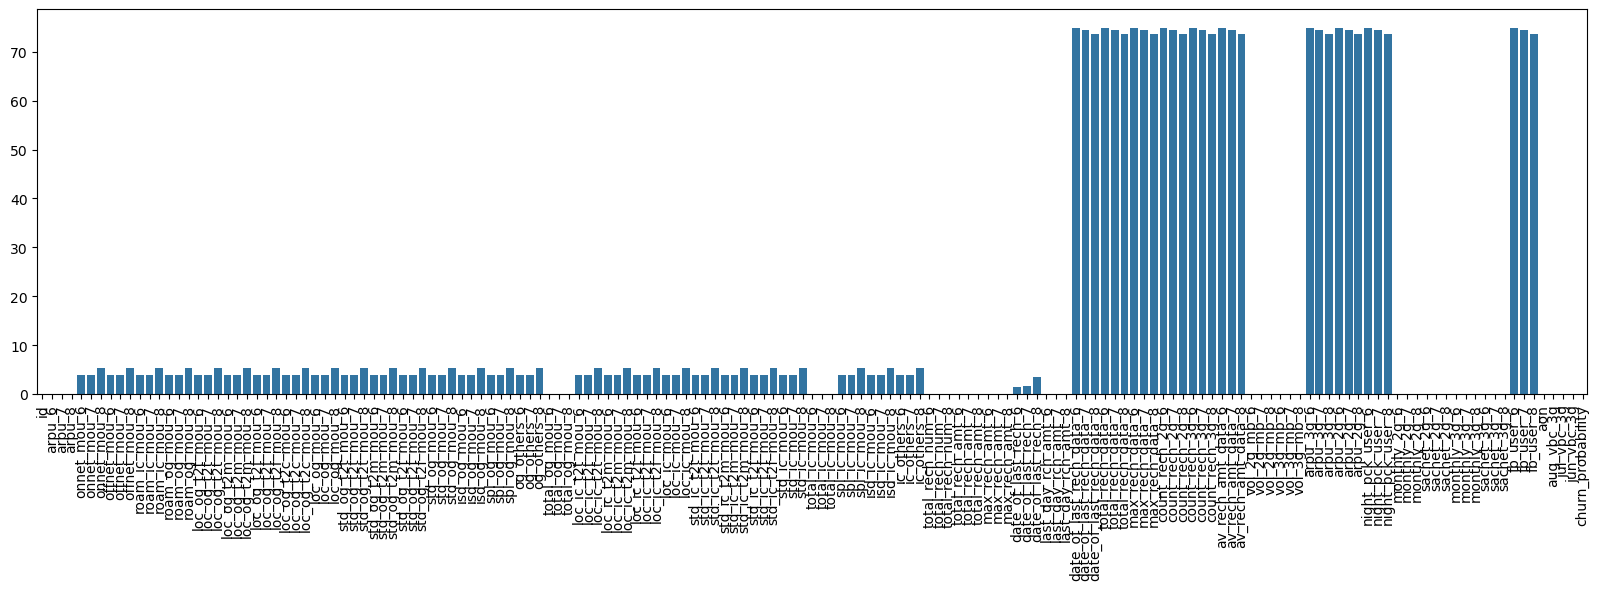

In [167]:
draw_missing_value_percentage(inp1)

## 3.2 Removal of columns based on missing values

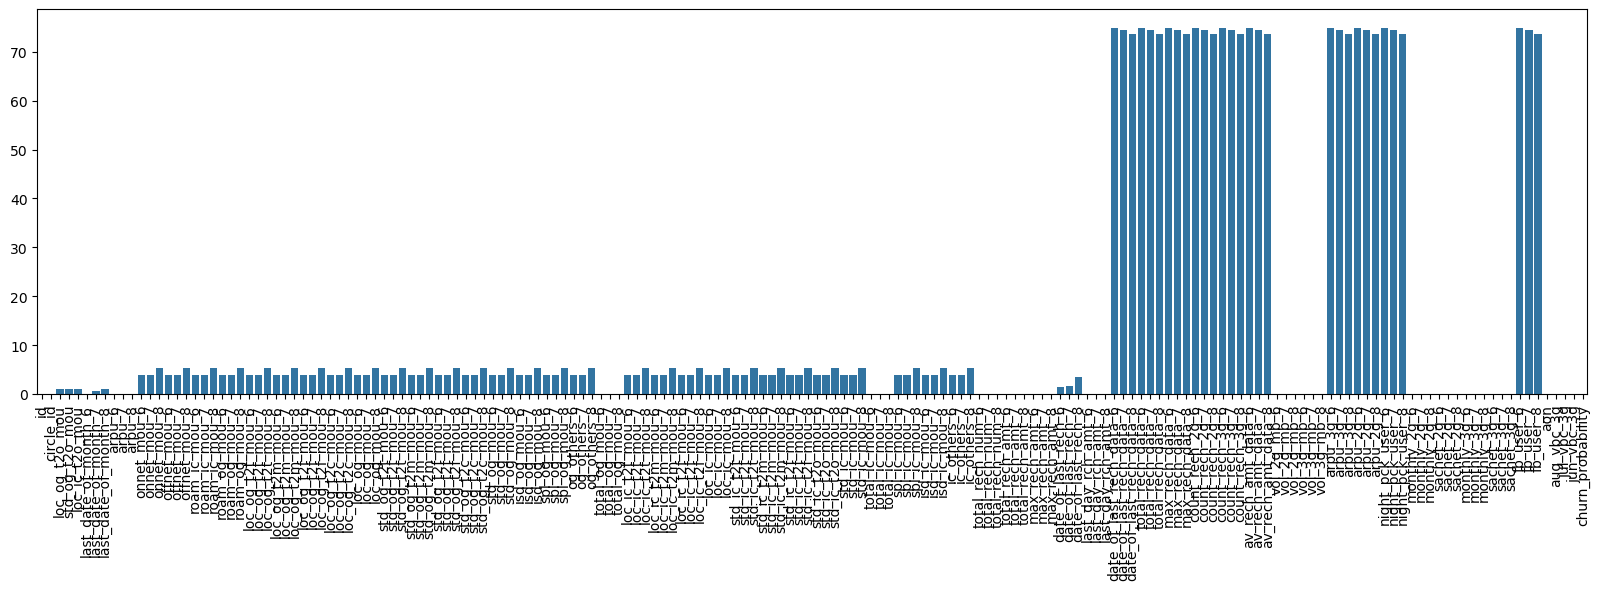

In [112]:
draw_missing_value_percentage(inp0)

### 3.2.1 Observation
- a bunch of columns have have more than 70% missing values, they are clearly supposed to be dropped

In [168]:
data = inp1
temp = get_missing_value_percentage(data)
temp = temp[temp > 70]
drop_column_candidates = temp.index.to_list()
inp2 = data.drop(columns=drop_column_candidates)
print(f'inp1 shape: {inp1.shape}')
print(f'inp2 shape: {inp2.shape}')

inp1 shape: (69999, 159)
inp2 shape: (69999, 129)


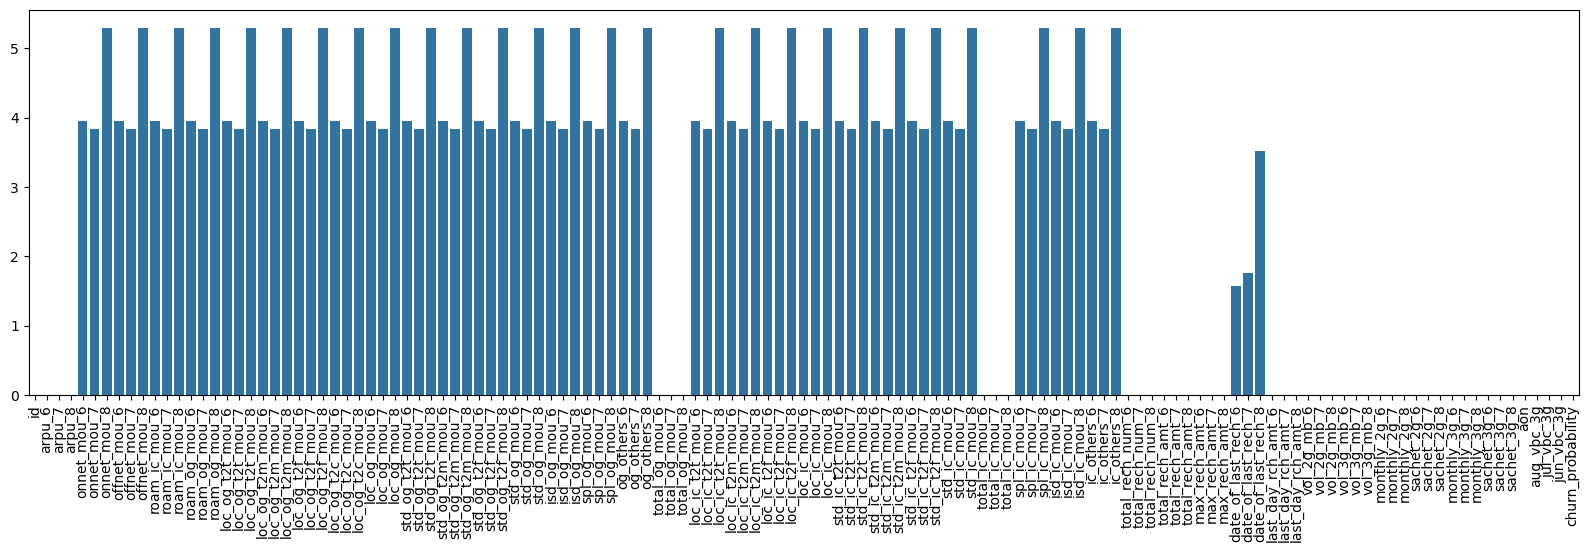

In [169]:
draw_missing_value_percentage(inp2)

## 3.4 Removal of empty rows

%rows missing greater than 0.77% of data = 12%
(8104, 129)


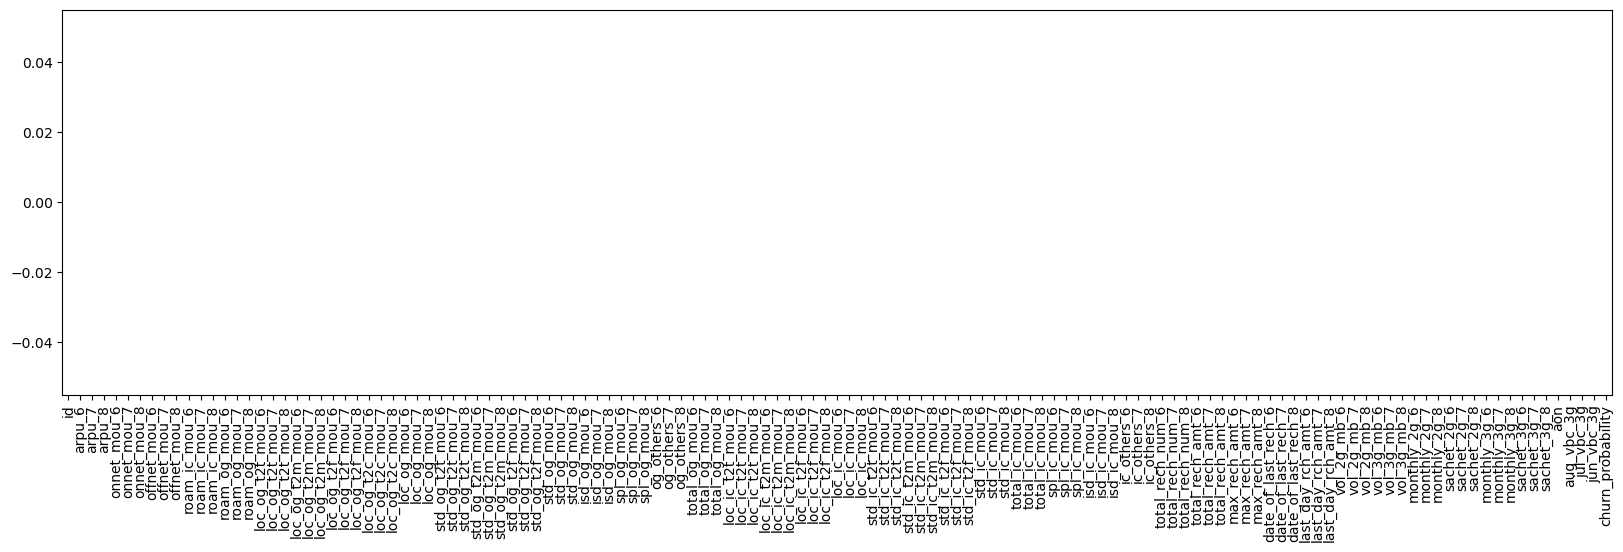

In [177]:
data = inp2
threshold = 0.77
temp = data.isnull().mean(axis=1)*100 > threshold
print(f'%rows missing greater than {threshold}% of data = {round(data[temp].shape[0]*100/data.shape[0])}%')
print(data[temp].shape)
draw_missing_value_percentage(data[~temp])

### 3.4.1 Observation
- we observe that only about 12% of entire dataset has all the missing data
- since 88% data is still a good amount of data with about 60k rows, let's remove the rows with more than 0.77% missing data
- removing this 12% of data allows us to impute data in very less number of columns

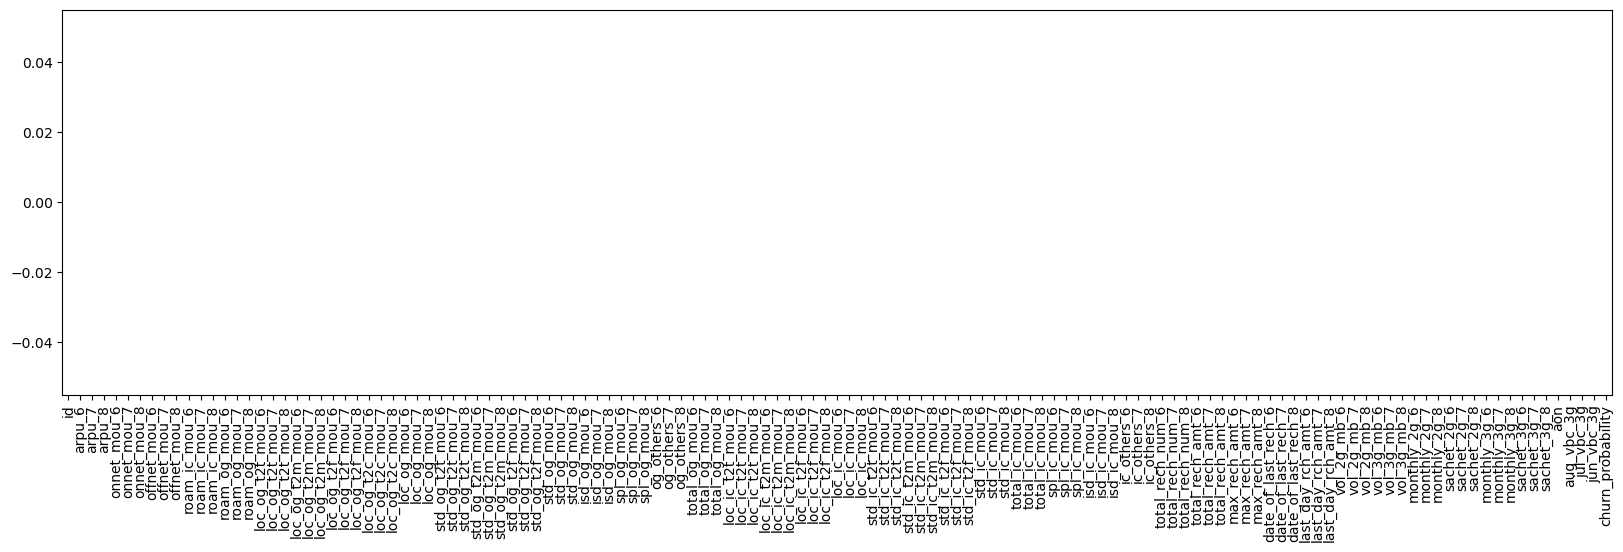

In [178]:
inp3 = inp2[~temp]
draw_missing_value_percentage(inp3)

### 3.4.2 Impute missing values

In [179]:
temp = get_missing_value_percentage(inp3)
temp = temp[temp > 0]
temp.sort_values(ascending=False)

Series([], dtype: float64)

#### 3.4.2.1 Observation
- removal of 12% of data removed all missing values
- based on the accuracy of the model, we will need to revisit this section again.

## 3.5 Data loss

In [180]:
print(f'initial shape = {inp0.shape}')
print(f'shape after cleaning = {inp3.shape}')
print(f'data loss after cleaning = {round (100*(inp0.shape[0]-inp3.shape[0])/inp0.shape[0])}%')

initial shape = (69999, 172)
shape after cleaning = (61895, 129)
data loss after cleaning = 12%


# Exploratory Data Analysis

# Feature engineering and Variable Transformation

# Modelling

# Conclusions